In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [66]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date',
                 parse_dates=['date'])
    
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


## Data Normalization

In [68]:
df = df[
    (df['value'] >= df['value'].quantile(0.025)) & 
    (df['value'] <= df['value'].quantile(0.975)) ]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## Daily freeCodeCamp Forum Page Views 5/2016-12/2019

Text(0, 0.5, 'Page Views')

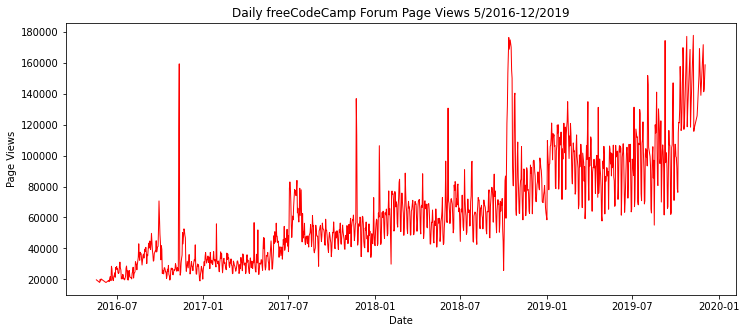

In [69]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.index, df['value'], 'r', linewidth=1)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

## average daily page views for each month grouped by year

In [75]:
df_bar = df.copy()
df_bar


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [76]:
df_bar['month'] = df_bar.index.month
df_bar['year'] = df_bar.index.year
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [77]:
df_bar = df_bar.unstack()
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

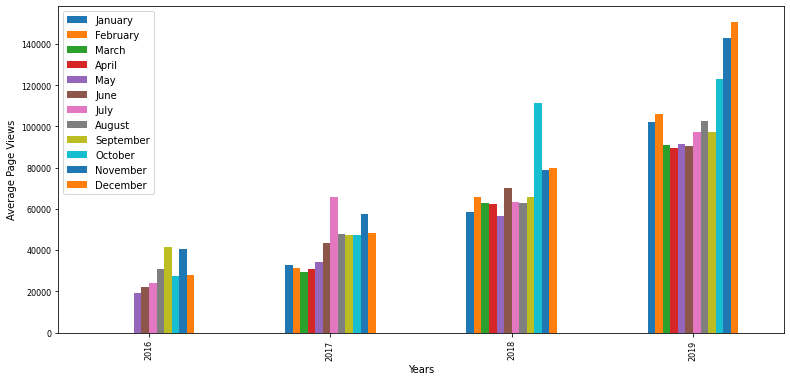

In [73]:
fig = df_bar.plot.bar(legend = True, figsize = (13, 6), xlabel="Years", ylabel="Average Page Views").figure
plt.legend(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

## Box plots

In [80]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [82]:
df_box['month_num']=df_box['date'].dt.month
df_box

,date,value,year,month,month_num
0,2016-05-19,19736,2016,May,5
1,2016-05-26,18060,2016,May,5
2,2016-05-27,19997,2016,May,5
3,2016-05-28,19044,2016,May,5
4,2016-05-29,20325,2016,May,5
...,...,...,...,...,...
1233,2019-11-24,138875,2019,Nov,11
1234,2019-11-29,171584,2019,Nov,11
1235,2019-11-30,141161,2019,Nov,11
1236,2019-12-01,142918,2019,Dec,12


In [84]:
df_box = df_box.sort_values('month_num')
df_box

,date,value,year,month,month_num
210,2017-01-06,37353,2017,Jan,1
593,2018-01-24,61700,2018,Jan,1
592,2018-01-23,62758,2018,Jan,1
572,2018-01-03,56013,2018,Jan,1
573,2018-01-04,58910,2018,Jan,1
...,...,...,...,...,...
902,2018-12-02,73710,2018,Dec,12
901,2018-12-01,62373,2018,Dec,12
921,2018-12-21,85083,2018,Dec,12
188,2016-12-15,42333,2016,Dec,12


Text(0, 0.5, 'Page Views')

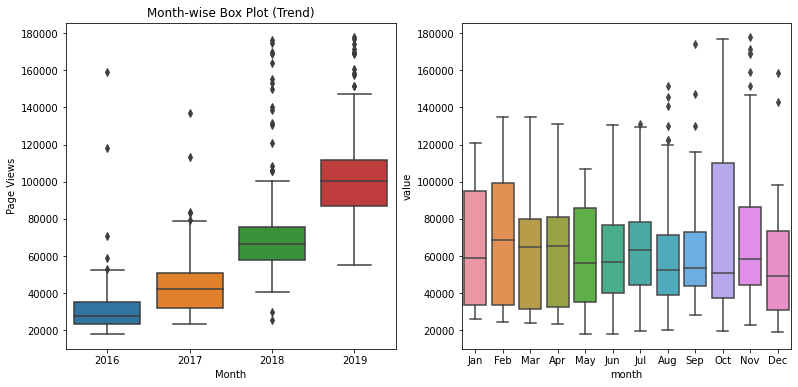

In [85]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 6))
axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

axes[0].set_title("Month-wise Box Plot (Trend)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Page Views")